<a href="https://colab.research.google.com/github/lakshanravi/langgraph-workflow-agents/blob/main/langgraph_stage_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langchain==0.3.24 -q
!pip install langchain-google-genai -q
!pip install langgraph -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 75.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langgraph-prebuilt 1.0.7 requires langchain-core>=1.0.0, but you have langchain-core 0.3.83 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.4/501.4 kB 18.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

### Chat Agent + Conversational Gemini Chat Agent

In [3]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END

# from typing import TypedDict, List, Union
# from langchain_core.messages import HumanMessage, AIMessage

In [10]:
#message list
class AgentState(TypedDict):
    messages: List[HumanMessage]
#abve msg list can be like this {
    #"messages": [HumanMessage(...), HumanMessage(...)]
#}
# class AgentState(TypedDict):
#     messages: List[Union[HumanMessage, AIMessage]]

In [14]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite",
    temperature=0
)


In [19]:
def chatbot(state: AgentState) -> AgentState:
  #llm.invoke() accepts a list of messages. So it treats it like a full chat conversation.This sends the entire message history to the LLM.
    response = llm.invoke(state["messages"])
    # state["messages"].append(AIMessage(content=response.content))
    print(f"\nAI: {response.content}")
    return state

In [17]:
workflow = StateGraph(AgentState)

workflow.add_node("chatbot", chatbot)

workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)

app = workflow.compile()

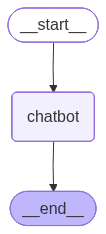

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

LLM works . But currently No memory

In [ ]:
LLM works . BUt currently No memory

In [22]:
user_input = input("Enter a Query: ")
result = app.invoke({"messages": [HumanMessage(content=user_input)]})

Enter a Query: hi

AI: Hi there! How can I help you today?


In [21]:
user_input = input("Enter a Query: ")
#here we use loop for get infinite user inputs

while user_input != "exit":
    result = app.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter a Query: ")

# conversation_history = []
# user_input = input("Enter a Query: ")
# while user_input != "exit":
#     conversation_history.append(HumanMessage(content=user_input))
#     result = app.invoke({"messages": conversation_history})
#     conversation_history = result["messages"]
#     user_input = input("Enter a Query: ")

KeyboardInterrupt: Interrupted by user